# Adults Income dataset kNN model and interactive visualisations using Plotly Dash

### Few notes before:
- to interact and view visualisations you must run notebook, run time in free Google Colab is ~60 sec so I strongly encourege you to try it
- Notebook is optimised, some parts of the code are commented out so it wouldn't take much resources

**_Enjoy!_**

Installing and importing crucial packages

In [ ]:
!pip install dash
!pip install jupyter_dash

In [265]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from pandas.plotting import scatter_matrix

Loading Adults Income dataset and gathering informations about data types and quality of data.

In [266]:
df = pd.read_csv('adult.csv')
df.drop(columns=['educational-num'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   gender          48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  income          48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [267]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Dataset doesnt have null values but "?" values occur, so we can drop those records contaning them.

In [268]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [269]:
df.isin(["?"]).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [270]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [271]:
df["workclass"] = df["workclass"].replace("?", np.nan)
df["occupation"] = df["occupation"].replace("?", np.nan)
df["native-country"] = df["native-country"].replace("?", np.nan)
df.isin(["?"]).sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [272]:
df.dropna(how = "any", inplace = True)
df.shape

(45222, 14)

And here we can see dataset contains small number of duplicates

In [273]:
df = df.drop_duplicates()
df.shape

(45175, 14)

In [274]:
df_plots = df.copy()
df_plots

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


After cleaning the data we can encode categorical data using sklearn Label Encoder.

In [275]:
label_encoder = LabelEncoder()

In [276]:
columns_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

for column_to_encode in columns_to_encode:
    unique_categories = df[column_to_encode].unique() 
    df[column_to_encode]= label_encoder.fit_transform(df[column_to_encode])
    encoded_labels = df[column_to_encode].unique()
    print(f'Column {column_to_encode} contains unique labels: {unique_categories}, represented as: {encoded_labels}.')

Column workclass contains unique labels: ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay'], represented as: [2 1 4 0 5 3 6].
Column education contains unique labels: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool'], represented as: [ 1 11  7 15  0 14  5  9 12  4  8  6 10  2  3 13].
Column marital-status contains unique labels: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse'], represented as: [4 2 6 5 0 3 1].
Column occupation contains unique labels: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces'], represented as: [ 6  4 10  7  9  2  0  3 12 11  8 13  5  1].
Column r

Now, we can create corelation heatmap between all features, using pearson's method.

In [277]:
corr = df.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool_)
np.fill_diagonal(mask, 1)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
abs_corr = upper.abs()
corr_pairs = abs_corr.unstack().sort_values(ascending=False)

print(f'Top correlation:\n{corr_pairs.head(5)}')

top_income_correlations = corr_pairs['income'].dropna().head(6)[1:]  # Excluding 'income' itself
print(f'Top 5 correlations with variable "income":\n{top_income_correlations}')

fig = px.imshow(corr, text_auto=True)
fig.show()


Top correlation:
gender          relationship    0.583139
marital-status  age             0.271265
hours-per-week  relationship    0.259112
income          relationship    0.253362
relationship    age             0.247572
dtype: float64
Top 5 correlations with variable "income":
age               0.236839
hours-per-week    0.227146
capital-gain      0.221071
gender            0.215741
marital-status    0.192499
dtype: float64


Next we can select features that are the most important in context of prdicting Adult's income

In [278]:
df_plots

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


To estimate number of bins we will use doeane method ([Look in numpy documentation](https://numpy.org/devdocs/reference/generated/numpy.histogram_bin_edges.html))<br/>
![Bins_metric](https://github.com/tobi303x/Adults-Income-KNN-model/assets/114963170/c5f7d4f8-ed79-40c0-a235-3b54d91adecd)


In [279]:
bins = np.histogram_bin_edges(df_plots['age'], bins='doane')
print(f'Bins edges: {bins}')

Bins edges: [17.    20.174 23.348 26.522 29.696 32.87  36.043 39.217 42.391 45.565
 48.739 51.913 55.087 58.261 61.435 64.609 67.783 70.957 74.13  77.304
 80.478 83.652 86.826 90.   ]


Now we initialize first interactive plot using Dash. After running notebook u can play with the plot below, by changing options in dropdown menu, changing density distribution via radio buttons and clicking on income (right side) to see isolated outputs for income target. 

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app2 = Dash(__name__)

options = ['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
           'occupation', 'relationship', 'race', 'gender', 'capital-gain',
           'capital-loss', 'hours-per-week', 'native-country']

app2.layout = html.Div([
    html.H4("Analysis number of occurencies in each category taking into consideration income", style={'font-family': 'Arial', 'font-size': '18px',"color": 'white'}),
    html.P("Select Distribution:", style={'font-family': 'Arial', 'font-size': '18px',"color": 'white'}),
    dcc.RadioItems(
        id='distribution',
        options=[{'label': i, 'value': i} for i in ['box', 'violin', 'rug']],
        value='box', inline=True, style={'font-family': 'Arial', 'font-size': '16px',"color": 'white'}
    ),
    html.P("Select Variable:", style={'font-family': 'Arial', 'font-size': '18px',"color": 'white'}),
    dcc.Dropdown(
        id='variable',
        # Generate options dynamically from the list
        options=[{'label': i, 'value': i} for i in options],
        value='age', style={'font-family': 'Arial', 'font-size': '16px',"color": 'black','paddingBottom': '10px'}
    ),
    dcc.Graph(id="graph"),
])

@app2.callback(
    Output("graph", "figure"), 
    [Input("distribution", "value"),
     Input("variable", "value")])
def display_graph(distribution, variable):
    bin_size = len(np.histogram_bin_edges(df[variable], bins='doane'))
    fig = px.histogram(
        df_plots, x=variable, color="income",
        marginal=distribution,
        hover_data=df.columns, nbins=bin_size)
    return fig

if __name__ == '__main__':
    app2.run_server(debug=False,port=8060)


Image of generated app, to interact and view you must run the notebook.
<br></br>
![Adults_Income_Visualisation_Dash_App](https://github.com/tobi303x/Adults-Income-KNN-model/assets/114963170/3575d55d-cf29-4df0-a30c-99db4669eece)

Now we can focus o choosing most valuable features in dataset

In [281]:
top_income_correlations = corr_pairs['income'].dropna().head(7)[1:]  # Excluding 'income' itself
print(f'Top 5 correlations with variable "income":\n{top_income_correlations}')

Top 5 correlations with variable "income":
age               0.236839
hours-per-week    0.227146
capital-gain      0.221071
gender            0.215741
marital-status    0.192499
capital-loss      0.148679
dtype: float64


As we can see variables age, hours-per-week, capital-gain, gender, marital-status, capital-loss are the 5 best in terms of correlation between our target(income)

In [282]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

I've decided to exclude fnlwgt, race, capital-gain, capital-loss for our model

In [283]:
X = df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'hours-per-week', 'native-country']]
Y = df['income']

Now we can split data to X-features and Y-target

In [284]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.25,random_state=33)
print("X_Train: ", X_Train.shape)
print("X_Test: ", X_Test.shape)
print("Y_Train: ", Y_Train.shape)
print("Y_Test: ", Y_Test.shape)

X_Train:  (33881, 9)
X_Test:  (11294, 9)
Y_Train:  (33881,)
Y_Test:  (11294,)


Scaling data

In [285]:
from sklearn.preprocessing import StandardScaler,RobustScaler
scaler = RobustScaler()

X_train_standard_scaler = scaler.fit_transform(X_Train) 
X_test_standard_scaler = scaler.transform(X_Test)

Using chi squred, PCA, and ExtraTreesClassifier we can determine of future importance in train data

In [286]:
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)

np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

print(features)

[1.148e+04 4.607e+00 4.206e+02 1.458e+03 3.037e+02 5.239e+03 6.833e+02
 8.208e+03 1.808e+01]
[[25  3 40]
 [38  0 50]
 [28  0 40]
 ...
 [58  4 40]
 [22  3 20]
 [52  5 40]]


In [287]:
pca = PCA(n_components=3)
fit = pca.fit(X)

print("PCA Components: ")
for i, component in enumerate(pca.components_):
    print(f"Component {i}: ", component)
print("Explained Varience: ", fit.explained_variance_ratio_)

PCA Components: 
Component 0:  [ 9.158e-01  6.829e-03  5.704e-03 -3.480e-02  6.121e-04 -3.779e-02
  5.510e-03  3.983e-01 -1.599e-04]
Component 1:  [-3.996e-01  8.185e-04  2.160e-02 -6.555e-03  6.712e-03 -1.836e-02
  7.275e-03  9.161e-01  6.725e-03]
Component 2:  [-2.854e-03 -7.098e-04 -7.878e-02  6.077e-03  5.658e-03  1.513e-03
  6.598e-04  7.958e-03 -9.968e-01]
Explained Varience:  [0.464 0.35  0.094]


In [288]:
model = ExtraTreesClassifier()
model.fit(X, Y)
print("Feature Importance: ", model.feature_importances_)
indices = np.argsort(model.feature_importances_)[::-1]

print("Two most important features for prediction: ")
for i in range(2):
    print(f"Feature {indices[i]}: {model.feature_importances_[indices[i]]}")

predictions = model.predict(X_Test)
print("Predictions: ", predictions)


Feature Importance:  [0.269 0.055 0.139 0.091 0.12  0.11  0.032 0.156 0.028]
Two most important features for prediction: 
Feature 0: 0.26917541073735846
Feature 7: 0.15604132359859105
Predictions:  [1 1 1 ... 1 0 0]


Using ExtraTreesClassifier we can determine two features for later visualisation

In [289]:
two_important_features = X.iloc[:, indices[:2]]
two_important_features


,age,hours-per-week
0,25,40
1,38,50
2,28,40
3,44,40
5,34,30
...,...,...
48837,27,38
48838,40,40
48839,58,40
48840,22,20


Below are some different models benchmark. Decided to comment out because of compute time required

In [290]:
# num_instances = len(X)

# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# models.append(('SGDC', SGDClassifier()))

# # Evaluations
# results = []
# names = []

# for name, model in models:
#     # Fit the model
#     model.fit(X_Train, Y_Train)
    
#     predictions = model.predict(X_Test)
    
#     # Evaluate the model
#     score = accuracy_score(Y_Test, predictions)
#     mse = mean_squared_error(predictions, Y_Test)
#     # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#     results.append(mse)
#     names.append(name)
    
#     msg = "%s: %f (%f)" % (name, score, mse)
#     print(msg)

/home/tobi303/anaconda3/envs/PyEnv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LR: 0.759253 (0.240747)
LDA: 0.759253 (0.240747)
KNN: 0.795467 (0.204533)
CART: 0.780414 (0.219586)
NB: 0.754914 (0.245086)
SVM: 0.757039 (0.242961)
SGDC: 0.756951 (0.243049)


Finally we can benchmark our Knn model, we will be using canberra (weighted manhattan) metric to determine distances also I've experimented with hamming so u can try different metrics</br>
![Manhattan_metric](https://github.com/tobi303x/Adults-Income-KNN-model/assets/114963170/5f6a46dd-3b89-4169-96f1-f1de1e3536d3) vs. ![Hamming_metric](https://github.com/tobi303x/Adults-Income-KNN-model/assets/114963170/342c7c12-32b4-4ddb-b9ad-408a85b046f2)</br>
![Manhattan_formula](https://github.com/tobi303x/Adults-Income-KNN-model/assets/114963170/68414f26-ae4e-48cf-8c02-fb8f890d75d4)
![Canaberra_formula](https://github.com/tobi303x/Adults-Income-KNN-model/assets/114963170/ed8770fc-2d46-49ed-baf5-413cba0f0e3e)

In [291]:
knn = KNeighborsClassifier(n_neighbors=9, metric = 'canberra')
knn.fit(X_Train, Y_Train)
predict = knn.predict(X_Test)
predict

array([0, 0, 1, ..., 1, 1, 0])

Here we can determine the error value with increasing numbers of K, by deafalt I commented whole section in order to reduce compution time, for me it was over 4 min

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error
# from matplotlib.ticker import MaxNLocator

# def calculate_error(X_train, Y_train, X_test, Y_test, max_k=20):
#     error_rates = []

#     for i in range(1, max_k+1):
#         knn = KNeighborsClassifier(n_neighbors=i, metric = 'canberra')
#         knn.fit(X_train, Y_train)
#         pred_i = knn.predict(X_test)
#         error = mean_squared_error(Y_test, pred_i)
#         error_rates.append(error)

#     return error_rates

# def plot_error_rates(error_rates):
#     plt.figure(figsize=(10,6))
#     plt.plot(range(1,len(error_rates)+1), error_rates, color='purple')
#     plt.title('Error Rate with rising neighbours')
#     plt.xlabel('Number of neighbours')
#     plt.ylabel('Error Rate')
#     ax = plt.gca()
#     ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#     plt.show()

# # calculate error rates
# error_rates = calculate_error(X_Train, Y_Train, X_Test, predict)

# # plot error rates
# plot_error_rates(error_rates)


Returned plot of upper part of commented code

![K_values_plot](https://github.com/tobi303x/Adults-Income-KNN-model/assets/114963170/d73fe850-a035-4f90-bed4-92ee8cff0127)

Next we can use K-fold cross validation in order to test on multiple splits so we can get a better idea on how the model will perform on unseen data

![Cross_validation_KFold](https://github.com/tobi303x/Adults-Income-KNN-model/assets/114963170/d97b660b-aa49-4498-bc75-fd6ff639dbed)

In [298]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=9)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, Y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print(f'‘Cross validation scores mean: {np.mean(cv_scores)}')

[0.79  0.793 0.79  0.794 0.798]
‘Cross validation scores mean: 0.79300498063088


Below we have scores of model

In [299]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
print('Accuracy Score: ', accuracy_score(Y_Test, predict))
print('Precision Score: ', precision_score(Y_Test, predict))
print('Recall Score: ', recall_score(Y_Test, predict))
print('F1 Score: ', f1_score(Y_Test, predict))

Accuracy Score:  0.824331503453161
Precision Score:  0.6542207792207793
Recall Score:  0.5874635568513119
F1 Score:  0.619047619047619


In [300]:
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      8550
           1       0.65      0.59      0.62      2744

    accuracy                           0.82     11294
   macro avg       0.76      0.74      0.75     11294
weighted avg       0.82      0.82      0.82     11294



Using confusion matrix plot we can visualise instances of positive vs. error predictions

In [301]:
import numpy as np
import plotly.express as px

confusion_m = confusion_matrix(Y_Test, predict)
confusion_m = np.round((confusion_m / confusion_m.sum()) * 100, 2)

fig = px.imshow(confusion_m, text_auto=True, labels=dict(x="Predicted Labels", y="True Labels", color="Color scale"),
                x=['0', '1'],
                y=['0', '1']
               )

fig.show()

Now we will shuffle split our data for plotting using Stratified's method, I found it works pretty good when dataset is not normalized and there are some disproportions in each class distribution.

![Stratified_shuffle_split](https://github.com/tobi303x/Adults-Income-KNN-model/assets/114963170/7eee6439-f336-44e9-bd2c-e6bfc03876a0)

On generated histograms we can see distrution comparision between fulldataset and generated sample (100 records)

Full dataset histogram: [[<Axes: title={'center': 'age'}> <Axes: title={'center': 'workclass'}>
  <Axes: title={'center': 'fnlwgt'}>
  <Axes: title={'center': 'education'}>]
 [<Axes: title={'center': 'marital-status'}>
  <Axes: title={'center': 'occupation'}>
  <Axes: title={'center': 'relationship'}>
  <Axes: title={'center': 'race'}>]
 [<Axes: title={'center': 'gender'}>
  <Axes: title={'center': 'capital-gain'}>
  <Axes: title={'center': 'capital-loss'}>
  <Axes: title={'center': 'hours-per-week'}>]
 [<Axes: title={'center': 'native-country'}>
  <Axes: title={'center': 'income'}> <Axes: > <Axes: >]]
Sampled dataset histogram: [[<Axes: title={'center': 'age'}> <Axes: title={'center': 'workclass'}>
  <Axes: title={'center': 'fnlwgt'}>
  <Axes: title={'center': 'education'}>]
 [<Axes: title={'center': 'marital-status'}>
  <Axes: title={'center': 'occupation'}>
  <Axes: title={'center': 'relationship'}>
  <Axes: title={'center': 'race'}>]
 [<Axes: title={'center': 'gender'}>
  <Axes: ti

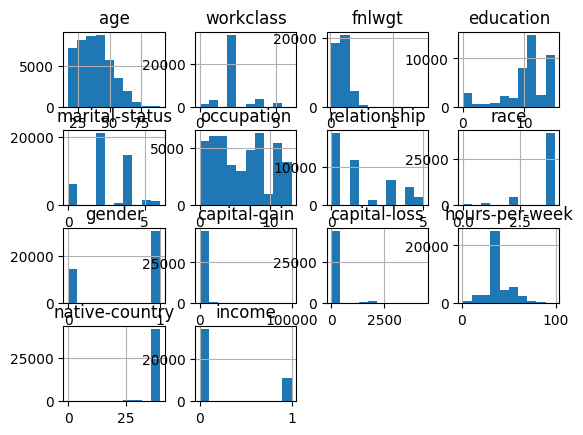

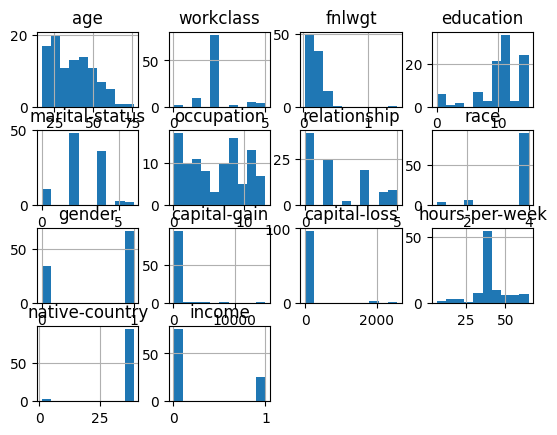

In [302]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=100, random_state=33)
for train_index, test_index in sss.split(df, Y):
    stratified_sample_df = df.iloc[test_index]
print(f'Full dataset histogram: {df.hist()}')
print(f'Sampled dataset histogram: {stratified_sample_df.hist()}')

At the end we can make interactive plot for visualizing numbers of K impacting regions of confidence score as contours. You can swith between different K-number on slider and click on the legends contours to separate train and test for y=1 and y=0. At the bottom under slider you can seee scores for samplet dataset.

In [ ]:
from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
import plotly.graph_objects as go
import numpy as np

app = Dash(__name__)

app.layout = html.Div([
    html.H4('k-NN classification prediction plot', style={'font-family': 'Arial', 'font-size': '24px',"color": 'white', 'background':'blck'}),
    dcc.Graph(id="graph"),
    html.P("Select number of neighbors:", style={'font-family': 'Arial', 'font-size': '18px',"color": 'white', 'background':'blck'}),
    dcc.Slider(
        id='slider-neighbors',
        min=1, max=20, step=1, value=9,
        marks={i: str(i) for i in range(1,21,1)}),
    html.H4('Scores for sampled data: ', style={'font-family': 'Arial', 'font-size': '18px',"color": 'white', 'background':'blck'}),
    html.Div(id='accuracy', style={'font-family': 'Arial', 'font-size': '16px',"color": 'white', 'background':'blck','margin-top': '5px'}),
    html.Div(id='precision', style={'font-family': 'Arial', 'font-size': '16px',"color": 'white', 'background':'blck','margin-top': '5px'}),
    html.Div(id='recall', style={'font-family': 'Arial', 'font-size': '16px',"color": 'white', 'background':'blck','margin-top': '5px'}),
    html.Div(id='f1', style={'font-family': 'Arial', 'font-size': '16px',"color": 'white', 'background':'blck','margin-top': '5px'})
])


@app.callback(
    [Output("graph", "figure"), 
     Output('accuracy', 'children'),
     Output('precision', 'children'),
     Output('recall', 'children'),
     Output('f1', 'children')],
    Input("slider-neighbors", "value"))
def train_and_display_model(k):
    df_sampled = stratified_sample_df.iloc[:,[0, 11, 13]].sample(n=100, random_state=33).copy()

    # Now split the sampled DataFrame into X and y
    X = df_sampled.drop('income', axis=1).values
    standard_scaler = StandardScaler()
    X = standard_scaler.fit_transform(X)
    y = df_sampled['income'].values

    xrange, yrange = build_range(X, y)
    xx, yy = np.meshgrid(xrange, yrange)
    test_input = np.c_[xx.ravel(), yy.ravel()]

    clf = KNeighborsClassifier(k, weights='uniform') #here u can add custom distance metric as canaberra, manhattan, euclidean etc.
    clf.fit(X, y)
    Z = clf.predict_proba(test_input)[:, 1]
    Z = Z.reshape(xx.shape)
    fig = build_figure(X, y, Z, xrange, yrange)
    # calculate metrics
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    return fig, f'Accuracy: {accuracy}', f'Precision: {precision}', f'Recall: {recall}', f'F1 Score: {f1}'


# ############ HELPER FUNCTIONS ############
def build_range(X, y, mesh_size=.6, margin=.6):
    """
    Create an x range and a y range for building meshgrid
    """
    x_min = X[:, 0].min() - margin
    x_max = X[:, 0].max() + margin
    y_min = X[:, 1].min() - margin
    y_max = X[:, 1].max() + margin

    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    return xrange, yrange


def build_figure(X, y, Z, xrange, yrange):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y.astype(str), test_size=0.25, random_state=0)

    trace_specs = [
        [X_train, y_train, '0', 'Train', 'square','#D8BBEA'],
        [X_train, y_train, '1', 'Train', 'circle','#EAEDA6'],
        [X_test, y_test, '0', 'Test', 'square-dot','#B157E9'],
        [X_test, y_test, '1', 'Test', 'circle-dot','#E3EA40']
    ]

    fig = go.Figure(data=[
        go.Scatter(
            x=X[y==label, 0], y=X[y==label, 1],
            name=f'{split}, y={label}',
            mode='markers', marker_symbol=marker,
            marker_color=color
        )
        for X, y, label, split, marker, color in trace_specs
    ])
    fig.update_traces(
        marker_size=12, marker_line_width=1,
        # marker_color="lightyellow"
        
    )

    fig.add_trace(
        go.Contour(
            x=xrange, y=yrange, z=Z,
            showscale=False, colorscale='RdBu',
            opacity=0.4, name='Score', hoverinfo='skip'
        )
    )

    return fig
app.run_server(debug=False, port=8010)

Image of generated app, to interact and view you must run the notebook.
<br></br>
![kNN_Visualisation_Dash_App](https://github.com/tobi303x/Adults-Income-KNN-model/assets/114963170/93d23c5b-b23e-459f-b86a-7a659b8c2070)
</details>